<a href="https://colab.research.google.com/github/choiminji-020102/Image-processing_Deep-learning/blob/main/09_Pytorch_%E1%84%80%E1%85%A2%E1%84%8B%E1%85%AD_%E1%84%86%E1%85%B5%E1%86%BE_CNN_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

- 파이썬 버젼 체크 (Python version Check)
- 파이토치 설치 (PyTorch Installation)
- 쿠다 및 CuDNN 체크 (Cuda & CuDNN Check)

## 1. Python Version Check
파이썬 버젼 체크

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


## 2. PyTorch Installation
- 구글 콜라브 버젼에 따라 파이토치가 설치되어 있을수도 있고 아닐 수도 있습니다.
- 설치가 안되어 있을 경우 아래와 같은 명령어로 설치하면 됩니다.
- !pip3 install torch torchvision

In [ ]:
import torch

In [ ]:
!pip3 install torch torchvision

## 3. Cuda & cudnn Version Check
- 파이토치를 통해 각각 몇 버젼이 설치 되어있는지 확인해줍니다.

In [ ]:
import torch

print("Torch version:{}".format(torch.__version__))
print("cuda version: {}".format(torch.version.cuda))
print("cudnn version:{}".format(torch.backends.cudnn.version()))

Torch version:2.1.0+cu118
cuda version: 11.8
cudnn version:8700


## 4. Command Line cuda & cudnn Check
- 쿠다 및 CuDNN 버젼은 커맨드라인 명령어로도 확인 가능합니다.

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!cat /usr/include/x86_64-linux-gnu/cudnn_v*.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 8
#define CUDNN_MINOR 9
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

/* cannot use constexpr here since this is a C-only file */


# 5. PyTorch CPU & GPU Tensor Check
- 파이토치 텐서를 생성해봄으로써 제대로 설치 되었는지, 잘 동작하는지 확인해줍니다.

### 5-1 Create CPU tensor

In [ ]:
# https://pytorch.org/docs/stable/torch.html?highlight=tensor#torch.tensor
# 0으로 차있는 2x3 형태의 텐서를 생성합니다.
cpu_tensor = torch.zeros(2,3)
print(cpu_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 5-2 Allocate tensor on GPU

In [ ]:
# https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.device
# 어느 장치(cpu 혹은 gpu)에 텐서를 올릴지 지정합니다.
# 아래는 torch.device라는 함수를 사용해 gpu로 장치를 지정합니다.
device = torch.device('cuda')

# https://pytorch.org/docs/stable/cuda.html?highlight=available#torch.cuda.is_available
# gpu가 사용 가능한지 확인해줍니다.
if torch.cuda.is_available():

  # https://pytorch.org/docs/stable/tensors.html?highlight=#torch.Tensor.to
  # cpu에 있었던 텐서를 to 함수를 이용해 지정해놓은 장치(여기서는 gpu)로 올려줍니다.

  ###################################################

  # 여기에 실습 코드를 적으시오
  gpu_tensor = cpu_tensor.to(device)
  print(gpu_tensor)
  ###################################################

tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


### 5-3 Reallocate tensor back on CPU

In [ ]:
# device 함수와 to 함수를 이용해 gpu에 있던 텐서를 다시 cpu로 옮겨올 수 있습니다.
cpu_tensor_back = gpu_tensor.to(torch.device('cpu'))
cpu_tensor_back

tensor([[0., 0., 0.],
        [0., 0., 0.]])

# 인공신경망 모델의 학습


## 필요한 라이브러리 불러오기

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

## 데이터 생성

In [ ]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2) + 3
y_noise = y + noise

# 모델, 손실 함수, 최적화 함수 설정

In [ ]:
# 3장의 예시처럼 하나의 값이 들어가서 하나의 값이 나오기 때문에 모델의 처음과 끝 특성의 개수는 1개입니다.

# https://pytorch.org/docs/stable/nn.html?highlight=sequential
# torch.nn.Sequential
# Sequential 모듈은 다양한 모듈을 담을 수 있는 일종의 리스트라고 보면 됩니다.
# Sequential 에 정의된 순서대로 연산이 진행되며, 많은 연산을 묶어서 한번에 관리할 수 있어서 편리합니다.

# 아래 코드는 특성의 개수가 1 -> 6 -> 10 -> 6 -> 1개로 변하는 인공신경망입니다.
# 또한 선형변환 이후 활성화 함수를 넣어 비선형성이 생기도록 했습니다.

###################################################

# 여기에 실습 코드를 적으시오
model = nn.Sequential(
          nn.Linear(1, 6),
          nn.ReLU(),
          nn.Linear(6, 10),
          nn.ReLU(),
          nn.Linear(10, 6),
          nn.ReLU(),
          nn.Linear(6, 1),
      )

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)
###################################################

## 모델의 학습

In [ ]:
loss_array = []

###################################################

# 여기에 실습 코드를 적으시오
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output, y_noise)
  loss.backward()
  optimizer.step()

  loss_array.append(loss.detach().numpy())
###################################################

## 손실 그래프

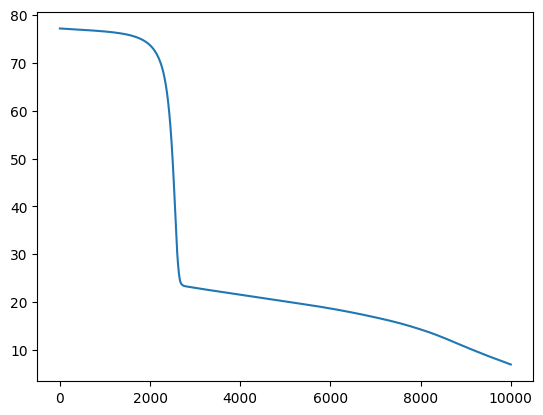

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

## 학습된 모델의 결과값과 실제 목표값의 비교

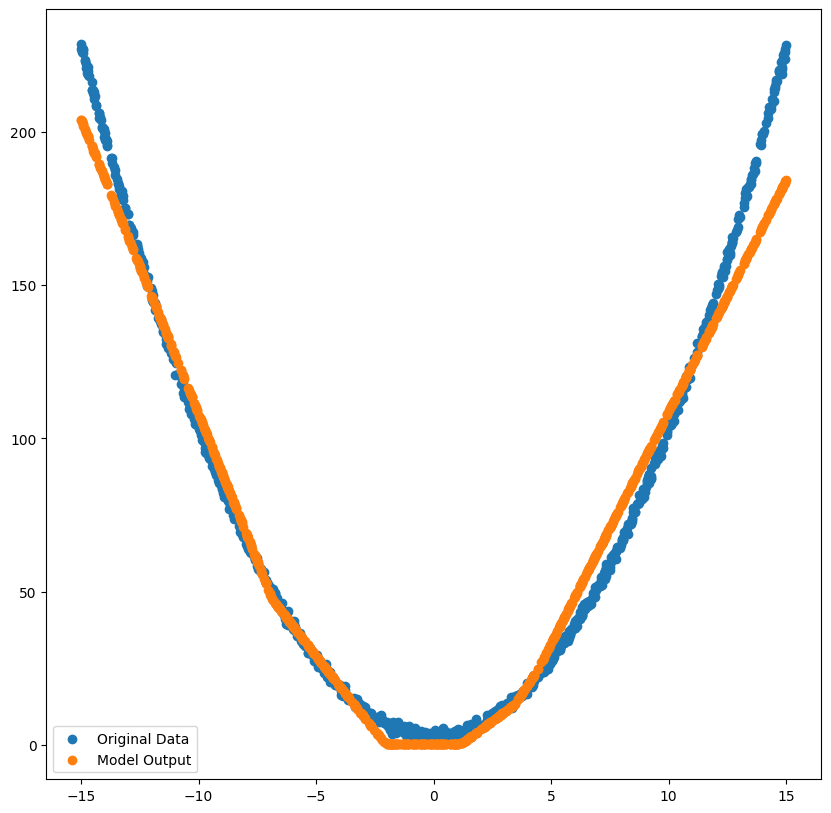

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(),y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()

# 컨볼루션 인공신경망 Convolutional Neural Network
- MNIST 데이터
- 합성곱 연산(CNN)
- 맥스풀링(Max Pooling)
- 완전연결 신경망(Fully Connected Network)

In [ ]:
# 파이토치 및 토치비젼 설치
# 런타임을 GPU 모드로 바꿔서 실행하세요
!pip install torch torchvision

## 1. 학습전 세팅
### 1) 필요한 라이브러리 불러오기

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

# https://pytorch.org/docs/stable/torchvision/datasets.html
# 파이토치에서는 torchvision.datasets에 MNIST 등의 다양한 데이터를 사용하기 용이하게 정리해놨습니다.
# 이를 사용하면 데이터를 따로 학습에 맞게 정리하거나 하지 않아도 바로 사용이 가능합니다.
import torchvision.datasets as dset

# https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transforms
# torchvision.transforms에는 이미지 데이터를 자르거나 확대 및 다양하게 변형시키는 함수들이 구현되어 있습니다.
import torchvision.transforms as transforms

# https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# DataLoader는 전처리가 끝난 데이터들을 지정한 배치 크기에 맞게 모아서 전달해주는 역할을 합니다.
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

2.1.0+cu118


### 2) 하이퍼파라미터 지정

In [ ]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

## 2. 데이터

### 1) 데이터 다운로드

In [ ]:
# https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=mnist#torchvision.datasets.MNIST
# 첫번째 인자 root는 데이터를 저장할 위치, train은 학습용 데이터인지 테스트용 데이터인지의 여부를 의미합니다.

# MNIST 데이터는 숫자 손글씨 이미지와 이에 대한 정답 쌍으로 이루어져 있습니다.
# transform은 이미지에 대한 변형, target_transform은 정답 라벨에 대한 변형을 의미합니다.
# transform.ToTensor()는 PIL 이미지나 Numpy 배열을 토치 텐서로 바꿔줍니다.

# download는 데이터가 저장할 위치에 없을 경우 새로 다운받을지 여부입니다.
mnist_train = dset.MNIST(root="../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST(root="../", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 144946436.96it/s]

Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 31333599.02it/s]


Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36993663.46it/s]

Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 6260443.24it/s]


Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw



### 2) 데이터셋 체크
- getitem을 사용해도 되고
- 인덱싱으로도 데이터를 확인할 수 있습니다.

In [ ]:
print(mnist_train.__getitem__(0)[0].size(), mnist_train.__len__())
print(mnist_test.__getitem__(0)[0].size(), mnist_test.__len__())

print(len(mnist_train),len(mnist_test))
#print(mnist_train[0])

torch.Size([1, 28, 28]) 60000
torch.Size([1, 28, 28]) 10000
60000 10000


### 3) DataLoader 설정
- 사용할 데이터
- 배치 사이즈 (batch_size)
- 섞을지 여부 (shuffle)
- 사용할 프로세스 개수 (num_workers)
- 마지막에 남는 데이터의 처리 여부 (drop_last)

In [ ]:
# https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader

###################################################

# 여기에 실습 코드를 적으시오
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

###################################################


## 3. 모델, 손실함수, 최적화함수

### 1) CNN 모델

- 실습 코드는 PPT 참고

In [ ]:
# https://pytorch.org/docs/stable/nn.html?highlight=conv2d#torch.nn.Conv2d
# https://pytorch.org/docs/stable/tensors.html?highlight=view#torch.Tensor.view


###################################################

# 여기에 실습 코드를 적으시오
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(

        nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5),
        nn.ReLU(),
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.fc_layer = nn.Sequential(
        nn.Linear(3*3*64, 100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )

  def forward(self, x):
    out = self.layer(x)
    out = out.view(batch_size, -1)

    out = self.fc_layer(out)
    return out
###################################################


### 2) 손실함수 & 최적화함수

In [ ]:
# gpu가 사용 가능한 경우에는 device를 gpu로 설정하고 불가능하면 cpu로 설정합니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# 모델을 지정한 장치로 올립니다.
model = CNN().to(device)

# 손실함수로는 크로스엔트로피를 사용합니다.
loss_func = nn.CrossEntropyLoss()

# 최적화함수로는 Adam을 사용합니다.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

cuda:0


## 4. 학습

In [ ]:
loss_arr =[]

###################################################

# 여기에 실습 코드를 적으시오
for i in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    x = image.to(device)
    y_ = label.to(device)

    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output, y_)
    loss.backward()
    optimizer.step()

    if j % 1000 == 0:
      print(loss)
      loss_arr.append(loss.cpu().detach().numpy())
###################################################


tensor(2.2955, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2544, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1192, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0656, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0839, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0434, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0386, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0482, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0724, device='cuda:0', grad_fn=<NllLossBackward0>)


In [ ]:
#param_list = list(model.parameters())
#print(param_list)

## 5. 학습시 손실 시각화

In [ ]:
plt.plot(loss_arr)
plt.show()

## 6. 테스트 데이터 정확도 측정

In [ ]:
# 맞은 개수, 전체 개수를 저장할 변수를 지정합니다.
correct = 0
total = 0


###################################################

# 여기에 실습 코드를 적으시오
with torch.no_grad():
  for image, label in test_loader:

    x = image.to(device)
    y_ = label.to(device)

    output = model.forward(x)

    _, output_index = torch.max(output, 1)

    total += label.size(0)

    correct += (output_index == y_).sum().float()

  print("Accuracy of Test Data: {}%".format(100*correct/total))
###################################################


# 실습 과제

### CNN 모델을 수정해보고, MNIST 판별 정확도 99%를 달성해 보시오.


In [ ]:
# https://pytorch.org/docs/stable/nn.html?highlight=conv2d#torch.nn.Conv2d
# https://pytorch.org/docs/stable/tensors.html?highlight=view#torch.Tensor.view


###################################################

# 여기에 실습 코드를 적으시오
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(

        nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3), #26,26,16
        nn.ReLU(),
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3), #24,24,32
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2), #12,12,32
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3), #10,10,64
        nn.ReLU(),
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3), #8,8,128
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) #4,4,128
    )
    self.fc_layer = nn.Sequential(
        nn.Linear(4*4*128, 100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )

  def forward(self, x):
    out = self.layer(x)
    out = out.view(batch_size, -1)

    out = self.fc_layer(out)
    return out
###################################################


In [ ]:
loss_arr =[]

###################################################

# 여기에 실습 코드를 적으시오
for i in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    x = image.to(device)
    y_ = label.to(device)

    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output, y_)
    loss.backward()
    optimizer.step()

    if j % 1000 == 0:
      print(loss)
      loss_arr.append(loss.cpu().detach().numpy())
###################################################


tensor(0.0238, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0138, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0314, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0246, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0089, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0923, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0115, device='cuda:0', grad_fn=<NllLossBackward0>)


## 5. 학습시 손실 시각화

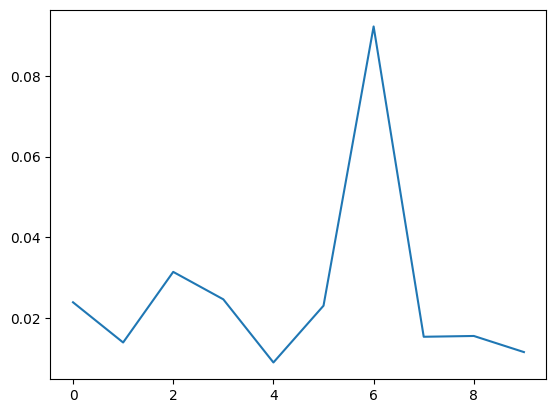

In [ ]:
plt.plot(loss_arr)
plt.show()

## 6. 테스트 데이터 정확도 측정

In [ ]:
# 맞은 개수, 전체 개수를 저장할 변수를 지정합니다.
correct = 0
total = 0


###################################################

# 여기에 실습 코드를 적으시오
with torch.no_grad():
  for image, label in test_loader:

    x = image.to(device)
    y_ = label.to(device)

    output = model.forward(x)

    _, output_index = torch.max(output, 1)

    total += label.size(0)

    correct += (output_index == y_).sum().float()

  print("Accuracy of Test Data: {}%".format(100*correct/total))
###################################################



Accuracy of Test Data: 99.21875%
